# Student performance in secondary school

## Data exploration

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

In [ ]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

print(y)

In [ ]:
X.head()

In [84]:
X = X.drop(columns=['address','famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   Medu        649 non-null    int64
 2   Fedu        649 non-null    int64
 3   traveltime  649 non-null    int64
 4   studytime   649 non-null    int64
 5   failures    649 non-null    int64
 6   famrel      649 non-null    int64
 7   freetime    649 non-null    int64
 8   goout       649 non-null    int64
 9   Dalc        649 non-null    int64
 10  Walc        649 non-null    int64
 11  health      649 non-null    int64
 12  absences    649 non-null    int64
dtypes: int64(13)
memory usage: 66.0 KB


In [ ]:
X.describe()

In [ ]:
y.head()

In [ ]:
y.info()

In [ ]:
y.describe()

In [ ]:
students = pd.concat([X, y], axis=1)
students

In [ ]:
sns.histplot(data=students, x='absences')
plt.show()

In [ ]:
sns.barplot(data=students, x='traveltime', y='G3')

In [ ]:
y["G"] = (y['G3'] > 10).astype(int)
y

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.G, test_size=0.3, random_state=21, stratify=y.G)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.6974358974358974


In [94]:
import numpy as np
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

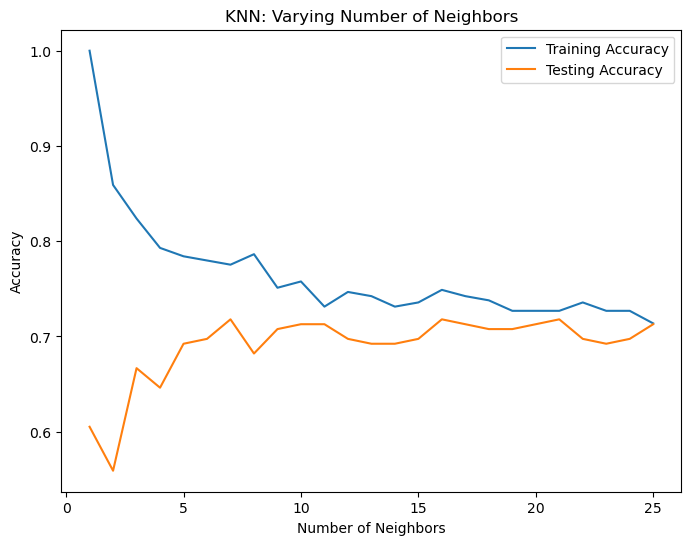

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [100]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=7)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 18  41]
 [ 14 122]]
              precision    recall  f1-score   support

           0       0.56      0.31      0.40        59
           1       0.75      0.90      0.82       136

    accuracy                           0.72       195
   macro avg       0.66      0.60      0.61       195
weighted avg       0.69      0.72      0.69       195



In [116]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict(X_test)

print(y_pred_probs[:10])

[0.83680942 0.87232345 0.47498471 0.87597356 0.30549374 0.7095353
 0.84519613 0.89252337 0.92434059 0.83262597]


C:\Users\Sanko\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


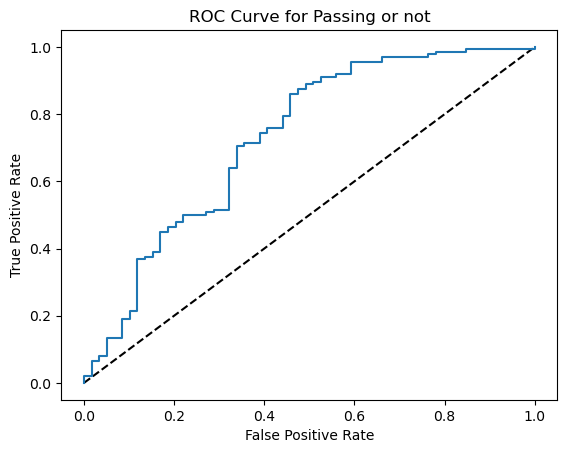

In [118]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Passing or not')
plt.show()

In [120]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report

print(classification_report(y_test, y_pred))

0.7271934197407777
[[ 28  31]
 [ 12 124]]
              precision    recall  f1-score   support

           0       0.70      0.47      0.57        59
           1       0.80      0.91      0.85       136

    accuracy                           0.78       195
   macro avg       0.75      0.69      0.71       195
weighted avg       0.77      0.78      0.77       195



NameError: name 'KFold' is not defined